# Inferential Statistics (Part I)

![Image](./images/central_limit_theorem.jpeg)

---

## Data and Sampling Distributions

#### Population Distribution 

The _population_ is assumed to follow the underlying but _unknown_ distribution (unless we're facing a physical process that can be modeled).

#### Sample Distribution

The _sample_ is the real data from which we can obtain its _empirical_ distribution in order to generate hypothesis about the population distribution.





---

### Random Sampling and Sample Bias

In a random sampling process every data point have the same posibility of being selected in each draw. Can be performed with or without replacement.

- __Sample:__ A subset from a larger dataset.

- __Population:__ The larger dataset or idea of a dataset.

- __N:__ The size of the population (_n:_ the size of the sample).

--

- __Random sampling:__ Drawing elements into a sample at random. 

- __Stratified sampling:__ Dividing the population into strata and randomly sampling from each strata.

- __Stratum:__ A homogeneous subgroup of a population with common characteristics.

- __Simple random sampling:__ The sample that results from random sampling without stratifying the population.

--

- __Bias:__ Systematic error (not random).

- __Sample bias:__ A sample that misrepresents the population.



In [1]:
# imports

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import sem

import seaborn as sns
import matplotlib.pylab as plt

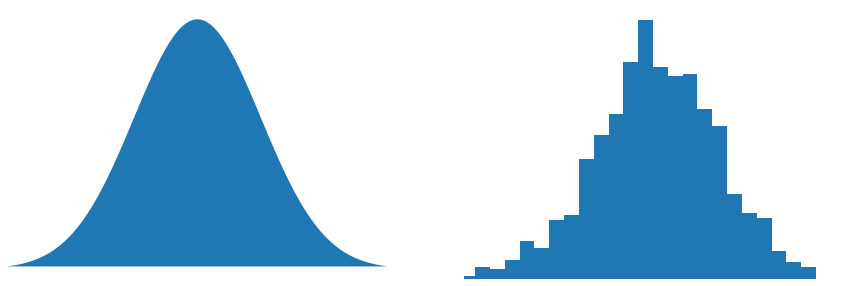

In [2]:
# Population vs. sample

np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position;

---

### Sampling Distribution of a Statistic


- __Data distribution:__ The frequency distribution of individual _values_ in a dataset.

- __Sample statistic:__ A metric calculated for a sample of data drawn from a larger population.

- __Sampling distribution:__ The frequency distribution of a sample statistic over many samples or resamples.

- __Central limit theorem:__ The tendency of the sampling distribution to take on a normal shape as sample size rises.

- __Standard error:__ The variability (standard error) of a sample _statistic_ over many samples.



In [3]:
loans_income = pd.read_csv('./datasets/loans_income.csv').squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [4]:
sample_data = pd.DataFrame({'income': loans_income.sample(1000),
                            'type': 'Data'})
sample_data

,income,type
40292,63000,Data
38959,92000,Data
17361,134000,Data
33996,52000,Data
26491,43000,Data
...,...,...
31345,110000,Data
12399,60000,Data
15,36000,Data
9943,48000,Data


In [5]:
sample_mean_05 = pd.DataFrame({'income': [loans_income.sample(5).mean() for _ in range(1000)],
                               'type': 'Mean of 5'})
sample_mean_05

,income,type
0,83700.0,Mean of 5
1,56200.0,Mean of 5
2,45000.0,Mean of 5
3,73000.0,Mean of 5
4,65200.0,Mean of 5
...,...,...
995,66161.0,Mean of 5
996,68939.8,Mean of 5
997,50400.0,Mean of 5
998,50400.0,Mean of 5


In [6]:
sample_mean_20 = pd.DataFrame({'income': [loans_income.sample(20).mean() for _ in range(1000)],
                               'type': 'Mean of 20'})
sample_mean_20

,income,type
0,81372.55,Mean of 20
1,60432.05,Mean of 20
2,69336.60,Mean of 20
3,72635.50,Mean of 20
4,69729.80,Mean of 20
...,...,...
995,70262.50,Mean of 20
996,75054.00,Mean of 20
997,79831.55,Mean of 20
998,69985.40,Mean of 20


In [7]:
results = pd.concat([sample_data,
                     sample_mean_05,
                     sample_mean_20])
results

,income,type
40292,63000.00,Data
38959,92000.00,Data
17361,134000.00,Data
33996,52000.00,Data
26491,43000.00,Data
...,...,...
995,70262.50,Mean of 20
996,75054.00,Mean of 20
997,79831.55,Mean of 20
998,69985.40,Mean of 20


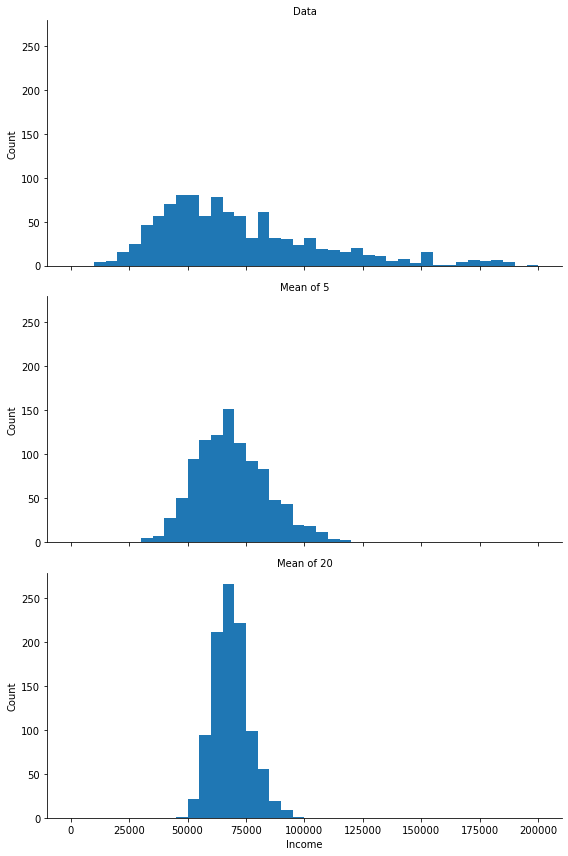

In [8]:
# Sample distribution vs. Sample statistic (mean) distribution

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=4, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()

#### Important observations:

- The distribution of a sample statistic such as the mean is likely to be more regular and bell-shaped than the distribution of the data itself (Central Limit Theorem).

- The larger the sample the statistic is based on, the more this is true.

- The larger the sample, the narrower the distribution of the sample statistic.

Check out [this](https://onlinestatbook.com/stat_sim/sampling_dist/) simulator

In [11]:
# Standard Error

sample_size = 1000

sample = loans_income.sample(sample_size)

sample_standard_error = sample.std() / np.sqrt(sample_size)   # Data approach

sampling_dist_se = sample_mean_20['income'].std()   # Sampling distribution of a statistic approach

print('Dataset mean:',loans_income.sample(1000).mean(),
      '\nDataset median:',loans_income.median(),
      '\nSample size:', sample_size,
      '\nSample standard error:', sample_standard_error,
      '\nStandard error of sampling distribution:', sampling_dist_se)

Dataset mean: 68141.363 
Dataset median: 62000.0 
Sample size: 1000 
Sample standard error: 1033.6875665478576 
Standard error of sampling distribution: 7625.452943457782


In [12]:
# Using scipy 

print('Sample standard error:', sem(sample))

Sample standard error: 1033.687566547855


Standard error estimates how accurate the mean of any given sample represents the true mean of the population.

---

### Normal Distribution (a.k.a. Z-Distribution)

In a normal distribution, 68% of the data lies within one standard deviation of the mean, 95% lies within two standard deviations, and 99.7% lies within three standard deviations.

- __Error:__ The difference between a data point and a predicted or average value.

- __Standardize:__ Substract the mean and divide it by the standard deviation.

- __Z-score:__ The result of standarizing an individual data point.

- __Standard normal:__ A normal distribution with mean = 0 and standard deviation = 1.

- __QQ-Plot:__ A plot to visualize how close a sample distribution is to a specified distribution (e.g.: the normal distribution)

In [13]:
# Normal distributed data
norm_sample = stats.norm.rvs(size=10000)

# Not-normal distributed data
sp500_px = pd.read_csv('./datasets/sp500_data.csv')
nflx = sp500_px['NFLX']
not_norm_sample = np.diff(np.log(nflx[nflx>0]))
not_norm_sample

array([ 0.1941524 , -0.28767869, -0.12516315, ..., -0.33897658,
       -0.29747412, -0.38983429])

Standard deviation of the sample: 1.0019651285283213


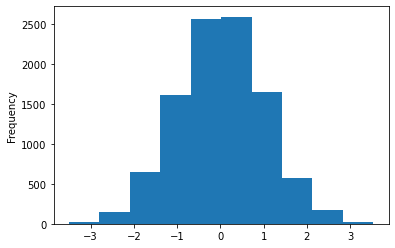

In [14]:
norm_sample = pd.Series(norm_sample)
norm_sample_sd = norm_sample.std()
print(f'Standard deviation of the sample: {norm_sample_sd}')
norm_sample.plot.hist();

Standard deviation of the sample: 1.4887909653966434


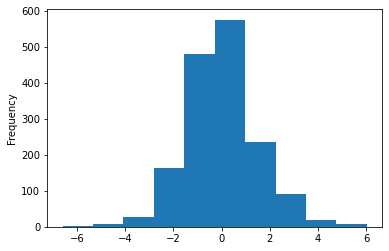

In [15]:
not_norm_sample = pd.Series(not_norm_sample)
not_norm_sample_sd = not_norm_sample.std()
print(f'Standard deviation of the sample: {not_norm_sample_sd}')
not_norm_sample.plot.hist();

Other distributions are:

- Long-Tailed Distributions

- Student's t-Distribution

- Binomial Distribution

- Chi-Square Distribution

- F-Distribution

- Poisson Distributions

- Exponential Distribution

- Weibull Distribution

---